Dataset Description :
1. 500 corn samples
2. 448 Spectral brands
3. Vomitoxin_parts per billion

Regression Task : Predict vomitoxin concentraion based on spectral data.


Choice of the model -
CNNs are a great fit for hyperspectral data because they can capture local spectral patterns (e.g., peaks/dips across adjacent bands) while being computationally efficient and widely successful in similar tasks.

We will treat 448 bands as 1D seqquence, leveraging convolutional filters to extract feeatures.


In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load Datasets
data  = pd.read_csv('/content/TASK-ML-INTERN.csv')

#Dataset Statisticss
print("Dataset Overview:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nDataset Summary Statistics:")
print(data.describe())

Dataset Overview:
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443   

In [ ]:
#Check for missng values
print("\n Missing Values Summary:")
print(data.isnull().sum())


 Missing Values Summary:
hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [ ]:
#Handle Missing Values
data = data.dropna()

In [ ]:
#Statistical Summary
print("\n Statistical Summary:")
print(data.describe())


 Statistical Summary:
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.04

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load the data
data = pd.read_csv('/content/TASK-ML-INTERN.csv')


# Extracting features and target
X = data.drop(['hsi_id', 'vomitoxin_ppb'], axis=1).values
y = data['vomitoxin_ppb'].values


In [47]:
# Preparing data for CNN model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Extracting features and target
X = data.drop(['hsi_id', 'vomitoxin_ppb'], axis=1).values
y = data['vomitoxin_ppb'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping data for CNN (samples, timesteps, channels)
X_train_scaled = np.expand_dims(X_train_scaled, axis=2)
X_test_scaled = np.expand_dims(X_test_scaled, axis=2)

# Defining a simple 1D CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')  # Regression output
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model performance
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)

test_loss, test_mae


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 194581504.0000 - mae: 3192.1292 - val_loss: 203000176.0000 - val_mae: 4070.4819
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 99997256.0000 - mae: 2460.6057 - val_loss: 202286272.0000 - val_mae: 4019.9019
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 146282816.0000 - mae: 3356.6106 - val_loss: 200639984.0000 - val_mae: 3961.8052
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 217433872.0000 - mae: 3754.9597 - val_loss: 197895632.0000 - val_mae: 3956.3821
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 80998992.0000 - mae: 2444.8240 - val_loss: 195185072.0000 - val_mae: 4048.2214
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 172268128.0000 - mae: 3573.1614 - val_loss: 192774800.0000 - val_mae: 4180.8345
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 175416576.0000 - mae: 3836.3264 - val_loss: 190783136.0000 - val_mae: 4245.1436
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10

(125028856.0, 3515.978759765625)

In [50]:
# Predict on the test set
y_pred = model.predict(X_test_scaled.squeeze())

# Evaluate regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


(3515.978574590981, 11181.629945259443, 0.5527225848455288)

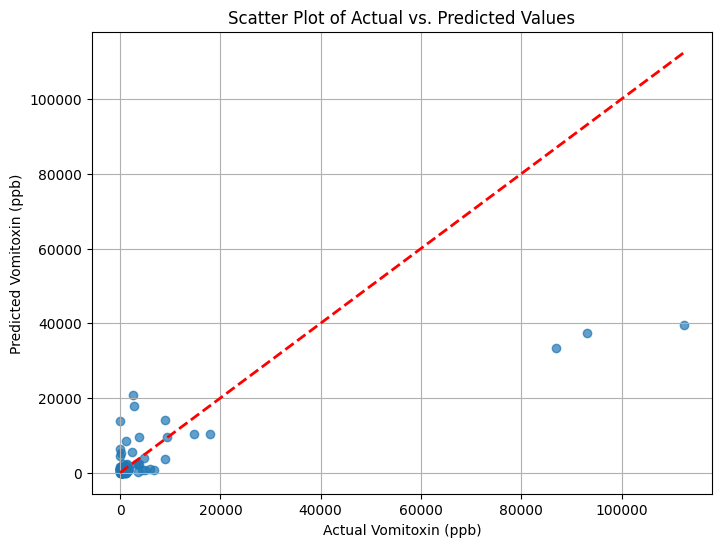

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.grid(True)
plt.show()


R^2 score of approximate 0.55 indicates moderate predictive performance suggesting room for imporvement by doing hyperparemeter optimizationn using random search techniques
